# Understanding Matrix Transformations: A Visual Guide

**Goal**: Understand what "orthogonal transformations" are and why they matter for matrix factorization.

This tutorial is designed for students with basic linear algebra knowledge (matrix multiplication, vectors). We'll build up from simple 2D examples to the general concepts used in the EFA limitation notebooks.

## What You'll Learn

1. **What do different matrix transformations do?** (stretching, rotating, reflecting)
2. **What makes a matrix "orthogonal"?** (length-preserving transformations)
3. **Why do orthogonal matrices matter?** (they preserve geometric properties)
4. **How does this connect to factorization ambiguity?** (infinitely many equivalent solutions)

---

**Prerequisites**: You should be comfortable with:
- Matrix-vector multiplication
- The concept of a basis in linear algebra
- What matrix transpose means

**Not required**: Group theory, advanced matrix theory, or differential geometry

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch

# Configure matplotlib for nice plots
plt.rcParams['figure.figsize'] = (14, 5)
plt.rcParams['font.size'] = 11

np.set_printoptions(precision=3, suppress=True)
print("Setup complete!")

Setup complete!


## Part 1: What Do Matrices Do to Vectors?

Let's start with a simple question: when we multiply a vector by a matrix, what happens?

We'll look at three types of transformations in 2D:
1. **Rotation**: Spin the vector around the origin
2. **Scaling**: Stretch or shrink the vector
3. **Shear**: Tilt/distort the vector

Let's visualize each one!

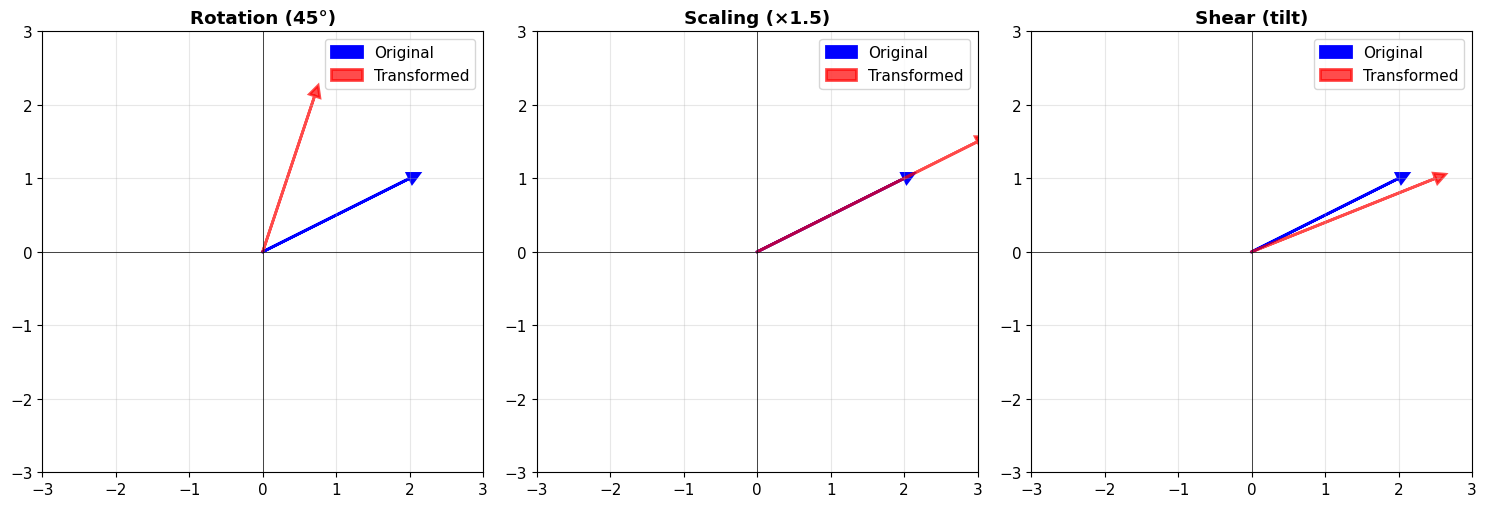


Vector lengths:
Original:  2.236
Rotated:   2.236  ← Same length!
Scaled:    3.354  ← Different length
Sheared:   2.693  ← Different length


In [2]:
def plot_vector_transformation(original, transformed, title, ax):
    """Helper function to plot before/after vectors"""
    # Plot original vector in blue
    ax.arrow(0, 0, original[0], original[1], 
             head_width=0.15, head_length=0.15, 
             fc='blue', ec='blue', linewidth=2, label='Original')
    
    # Plot transformed vector in red
    ax.arrow(0, 0, transformed[0], transformed[1], 
             head_width=0.15, head_length=0.15, 
             fc='red', ec='red', linewidth=2, alpha=0.7, label='Transformed')
    
    # Formatting
    ax.set_xlim(-3, 3)
    ax.set_ylim(-3, 3)
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3)
    ax.axhline(y=0, color='k', linewidth=0.5)
    ax.axvline(x=0, color='k', linewidth=0.5)
    ax.set_title(title, fontweight='bold')
    ax.legend(loc='upper right')

# Start with a simple vector
v = np.array([2, 1])

# Define three different transformations
# 1. Rotation by 45 degrees
angle = np.pi/4  # 45 degrees in radians
R_rotation = np.array([
    [np.cos(angle), -np.sin(angle)],
    [np.sin(angle),  np.cos(angle)]
])

# 2. Scaling (stretch by factor of 1.5)
R_scale = np.array([
    [1.5, 0],
    [0, 1.5]
])

# 3. Shear (tilt to the right)
R_shear = np.array([
    [1, 0.5],
    [0, 1]
])

# Apply transformations
v_rotated = R_rotation @ v
v_scaled = R_scale @ v
v_sheared = R_shear @ v

# Visualize all three
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

plot_vector_transformation(v, v_rotated, 'Rotation (45°)', axes[0])
plot_vector_transformation(v, v_scaled, 'Scaling (×1.5)', axes[1])
plot_vector_transformation(v, v_sheared, 'Shear (tilt)', axes[2])

plt.tight_layout()
plt.show()

# Print the lengths
print("\nVector lengths:")
print(f"Original:  {np.linalg.norm(v):.3f}")
print(f"Rotated:   {np.linalg.norm(v_rotated):.3f}  ← Same length!")
print(f"Scaled:    {np.linalg.norm(v_scaled):.3f}  ← Different length")
print(f"Sheared:   {np.linalg.norm(v_sheared):.3f}  ← Different length")

### Key Observation

**Rotation preserves length** — the red vector has the same length as the blue vector!  
**Scaling and shear change length** — the transformed vectors are longer.

This is our first clue about what makes orthogonal matrices special.

## Part 2: What Makes a Matrix "Orthogonal"?

A matrix $R$ is called **orthogonal** if it satisfies:

$$R^T R = I$$

where $R^T$ is the transpose and $I$ is the identity matrix.

### What does this mean geometrically?

**Orthogonal matrices preserve lengths and angles.**

In other words:
- If you rotate a vector, it stays the same length
- If you rotate two perpendicular vectors, they stay perpendicular
- No stretching, no squashing, no distortion

Let's verify this mathematically:

In [3]:
# Check which matrices are orthogonal
def is_orthogonal(R, tol=1e-10):
    """Check if R^T @ R = I"""
    identity = np.eye(R.shape[0])
    product = R.T @ R
    return np.allclose(product, identity, atol=tol)

print("Testing our three matrices:\n")

print("1. Rotation matrix:")
print(R_rotation)
print(f"   R^T @ R = ")
print(R_rotation.T @ R_rotation)
print(f"   Is orthogonal? {is_orthogonal(R_rotation)}\n")

print("2. Scaling matrix:")
print(R_scale)
print(f"   R^T @ R = ")
print(R_scale.T @ R_scale)
print(f"   Is orthogonal? {is_orthogonal(R_scale)}\n")

print("3. Shear matrix:")
print(R_shear)
print(f"   R^T @ R = ")
print(R_shear.T @ R_shear)
print(f"   Is orthogonal? {is_orthogonal(R_shear)}\n")

print("✓ Only the rotation matrix is orthogonal!")

Testing our three matrices:

1. Rotation matrix:
[[ 0.707 -0.707]
 [ 0.707  0.707]]
   R^T @ R = 
[[ 1. -0.]
 [-0.  1.]]
   Is orthogonal? True

2. Scaling matrix:
[[1.5 0. ]
 [0.  1.5]]
   R^T @ R = 
[[2.25 0.  ]
 [0.   2.25]]
   Is orthogonal? False

3. Shear matrix:
[[1.  0.5]
 [0.  1. ]]
   R^T @ R = 
[[1.   0.5 ]
 [0.5  1.25]]
   Is orthogonal? False

✓ Only the rotation matrix is orthogonal!


## Part 3: The Two Types of Orthogonal Transformations

Orthogonal matrices come in two flavors, distinguished by their **determinant**:

1. **Proper rotations**: $\det(R) = +1$ (pure rotation)
2. **Improper transformations**: $\det(R) = -1$ (rotation + reflection)

Let's see examples of each:

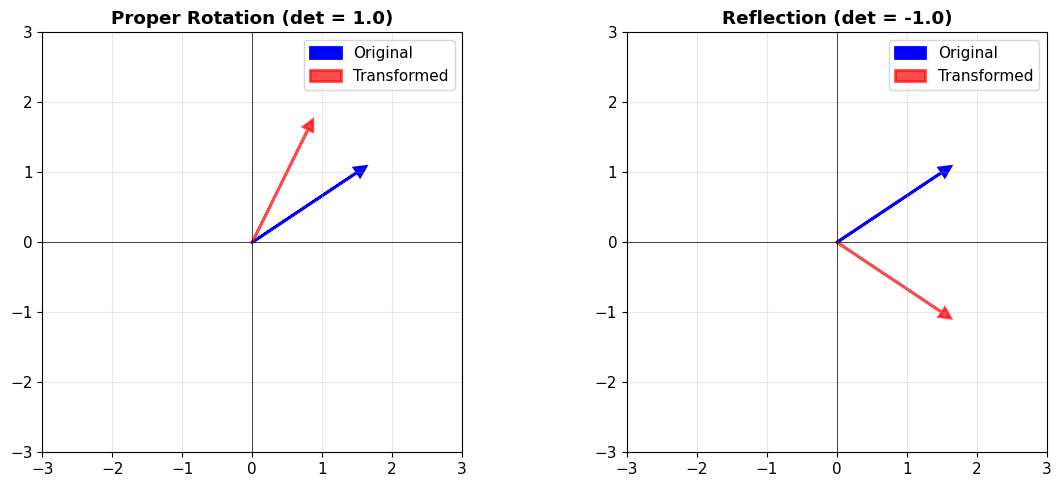


Both transformations:
- Preserve length: 1.803 → 1.803 and 1.803
- Are orthogonal: R^T R = I? True and True

But they differ in determinant:
- Rotation: det = 1 (orientation preserved)
- Reflection: det = -1 (orientation flipped)


In [4]:
# Create a rotation (det = +1)
angle = np.pi/6  # 30 degrees
R_proper = np.array([
    [np.cos(angle), -np.sin(angle)],
    [np.sin(angle),  np.cos(angle)]
])

# Create a reflection across x-axis (det = -1)
R_improper = np.array([
    [1,  0],
    [0, -1]
])

# Apply to a test vector
v_test = np.array([1.5, 1])
v_proper = R_proper @ v_test
v_improper = R_improper @ v_test

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

plot_vector_transformation(v_test, v_proper, 
                          f'Proper Rotation (det = {np.linalg.det(R_proper):.1f})', 
                          axes[0])
plot_vector_transformation(v_test, v_improper, 
                          f'Reflection (det = {np.linalg.det(R_improper):.1f})', 
                          axes[1])

plt.tight_layout()
plt.show()

print("\nBoth transformations:")
print(f"- Preserve length: {np.linalg.norm(v_test):.3f} → {np.linalg.norm(v_proper):.3f} and {np.linalg.norm(v_improper):.3f}")
print(f"- Are orthogonal: R^T R = I? {is_orthogonal(R_proper)} and {is_orthogonal(R_improper)}")
print(f"\nBut they differ in determinant:")
print(f"- Rotation: det = {np.linalg.det(R_proper):.0f} (orientation preserved)")
print(f"- Reflection: det = {np.linalg.det(R_improper):.0f} (orientation flipped)")

### Mathematical Classification

The complete set of orthogonal matrices is called the **orthogonal group**, denoted $O(n)$ for $n \times n$ matrices.

This group has two parts:
- **$SO(n)$** = Special Orthogonal group = proper rotations only ($\det = +1$)
- **$O(n) \setminus SO(n)$** = improper transformations ($\det = -1$)

Think of it like this:
- $O(n)$ = all length-preserving transformations
- $SO(n)$ = length-preserving transformations that don't flip orientation

## Part 4: Visualizing the Effect on Shapes

To really understand what orthogonal transformations do, let's apply them to an entire shape (not just one vector).

We'll transform a square and see what happens with different types of transformations:

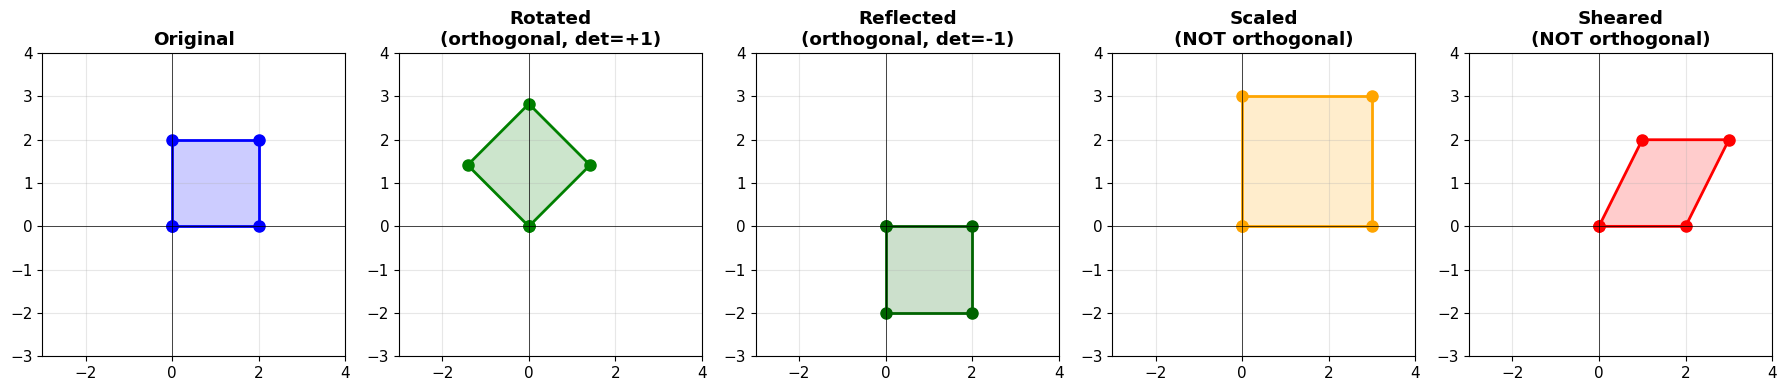

Notice:
✓ Rotation: Square stays a square (sides equal, angles 90°, det=+1)
✓ Reflection: Square stays a square but flipped (det=-1)
✗ Scaling: Square becomes larger but stays square (changes lengths)
✗ Shear: Square becomes a parallelogram (angles changed!)

→ Both orthogonal transformations preserve the square's geometry!


In [5]:
# Define a square (as column vectors)
square = np.array([
    [0, 2, 2, 0, 0],  # x-coordinates
    [0, 0, 2, 2, 0]   # y-coordinates
])

# Apply our four transformations (from Part 1)
square_rotated = R_rotation @ square
square_scaled = R_scale @ square
square_sheared = R_shear @ square

# Add reflection (from Part 3)
square_reflected = R_improper @ square

# Plot all five
fig, axes = plt.subplots(1, 5, figsize=(18, 4))

def plot_shape(points, ax, title, color='blue'):
    ax.plot(points[0, :], points[1, :], 'o-', color=color, linewidth=2, markersize=8)
    ax.fill(points[0, :], points[1, :], color=color, alpha=0.2)
    ax.set_xlim(-3, 4)
    ax.set_ylim(-3, 4)
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3)
    ax.axhline(y=0, color='k', linewidth=0.5)
    ax.axvline(x=0, color='k', linewidth=0.5)
    ax.set_title(title, fontweight='bold')

plot_shape(square, axes[0], 'Original', 'blue')
plot_shape(square_rotated, axes[1], 'Rotated\n(orthogonal, det=+1)', 'green')
plot_shape(square_reflected, axes[2], 'Reflected\n(orthogonal, det=-1)', 'darkgreen')
plot_shape(square_scaled, axes[3], 'Scaled\n(NOT orthogonal)', 'orange')
plot_shape(square_sheared, axes[4], 'Sheared\n(NOT orthogonal)', 'red')

plt.tight_layout()
plt.show()

print("Notice:")
print("✓ Rotation: Square stays a square (sides equal, angles 90°, det=+1)")
print("✓ Reflection: Square stays a square but flipped (det=-1)")
print("✗ Scaling: Square becomes larger but stays square (changes lengths)")
print("✗ Shear: Square becomes a parallelogram (angles changed!)")
print("\n→ Both orthogonal transformations preserve the square's geometry!")

## Part 4.5: 3D Examples — New Phenomena Not Observable in 2D

In 3D, orthogonal transformations become richer! Let's explore cases that don't exist in 2D.

### What's New in 3D?

In 2D, $O(2)$ has only:
- Rotations around the origin (det = +1)
- Reflections across a line (det = -1)

In 3D, $O(3)$ includes:
1. **Rotations around an axis** (det = +1) — generalization of 2D rotation
2. **Reflections across a plane** (det = -1) — generalization of 2D reflection
3. **Rotoinversion** (det = -1) — rotation + inversion through origin (NEW!)
4. **Inversion through origin** (det = -1) — special case: multiply all coordinates by -1

Let's visualize these with a 3D object!

In [33]:
# Helper function to draw parallelepipeds (from molass-legacy)
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection

def parallelogram(origin, v1, v2):
    """Create a parallelogram from origin and two vectors"""
    return [origin, origin+v1, origin+v1+v2, origin+v2]

def plot_parallelepiped_colored(ax, origin, vectors, face_colors=None, edgecolor='black', alpha=0.8):
    """
    Plot a parallelepiped with colored faces adjacent to origin and neutral opposite faces.
    
    Parameters:
    - origin: starting point [x, y, z]
    - vectors: list of 3 vectors defining the edges
    - face_colors: list of 3 colors for the three origin-adjacent faces (default: ['red', 'green', 'blue'])
    - edgecolor: edge color
    - alpha: transparency for origin-adjacent faces
    """
    if face_colors is None:
        face_colors = ['salmon', 'lightgreen', 'lightblue']  # RGB-ish for X, Y, Z faces
    
    verts_origin = []
    colors_origin = []
    verts_opposite = []
    
    for idx, (i, j, k) in enumerate([(0,1,2), (1,2,0), (2,0,1)]):
        vi = np.array(vectors[i])
        vj = np.array(vectors[j])
        vk = np.array(vectors[k])
        
        # Face at origin (perpendicular to vector k) - COLORED
        verts_origin.append(parallelogram(np.zeros(3), vi, vj))
        colors_origin.append(face_colors[idx])
        
        # Opposite face (shifted by vector k) - NEUTRAL & MORE TRANSPARENT
        verts_opposite.append(parallelogram(vk, vi, vj))
    
    # Add origin-adjacent faces with normal transparency
    ax.add_collection3d(Poly3DCollection(verts_origin, facecolors=colors_origin, linewidths=1, alpha=alpha, edgecolors=edgecolor))
    # Add opposite faces with higher transparency
    ax.add_collection3d(Poly3DCollection(verts_opposite, facecolors='whitesmoke', linewidths=1, alpha=0.15, edgecolors=edgecolor))
    # Add edges
    all_verts = verts_origin + verts_opposite
    ax.add_collection3d(Line3DCollection(all_verts, colors=edgecolor, linewidths=1.5, linestyles='-'))

# Define a unit cube using three orthogonal unit vectors
unit_vectors = [
    np.array([1, 0, 0]),  # x-direction
    np.array([0, 1, 0]),  # y-direction
    np.array([0, 0, 1])   # z-direction
]

# Define face colors that match the perpendicular axes
# Strategy: face color matches the axis it's perpendicular to
# Loop order [(0,1,2), (1,2,0), (2,0,1)] creates faces: xy, yz, zx
face_colors = ['skyblue', 'salmon', 'lightgreen']  # xy-faces (⊥Z-axis), yz-faces (⊥X-axis), zx-faces (⊥Y-axis)

# Define 3D transformations (from Part 3)
# 1. Rotation around z-axis by 45° (det = +1)
angle_3d = np.pi/4
R_rot_z = np.array([
    [np.cos(angle_3d), -np.sin(angle_3d), 0],
    [np.sin(angle_3d),  np.cos(angle_3d), 0],
    [0, 0, 1]
])

# 2. Reflection across xy-plane (flip z-coordinate, det = -1)
R_reflect_xy = np.array([
    [1,  0,  0],
    [0,  1,  0],
    [0,  0, -1]
])

# 3. Rotoinversion: 120° rotation around z-axis + inversion (det = -1)
# This is a 3-fold rotoinversion axis (common in crystallography)
angle_120 = 2*np.pi/3  # 120 degrees
R_rotoinv = -np.array([  # Negative sign = inversion after rotation
    [np.cos(angle_120), -np.sin(angle_120), 0],
    [np.sin(angle_120),  np.cos(angle_120), 0],
    [0, 0, 1]
])

# 4. Pure inversion: (x,y,z) → (-x,-y,-z) (det = -1)
R_inversion = -np.eye(3)

# 5. For comparison: Scaling (NOT orthogonal)
R_scale_3d = np.array([
    [1.5,  0,  0],
    [0,  1.5,  0],
    [0,  0, 0.5]
])

# 6. For comparison: Shear (NOT orthogonal)
R_shear_3d = np.array([
    [1, 0.5,  0],
    [0,  1,  0],
    [0,  0,  1]
])

# Apply transformations to the unit cube vectors
def transform_vectors(R, vecs):
    """Apply transformation R to a list of vectors"""
    return [R @ v for v in vecs]

cube_rotated = transform_vectors(R_rot_z, unit_vectors)
cube_reflected = transform_vectors(R_reflect_xy, unit_vectors)
cube_rotoinv = transform_vectors(R_rotoinv, unit_vectors)
cube_inverted = transform_vectors(R_inversion, unit_vectors)
cube_scaled = transform_vectors(R_scale_3d, unit_vectors)
cube_sheared = transform_vectors(R_shear_3d, unit_vectors)

# Verify orthogonality
print("Checking 3D transformations:\n")
print("ORTHOGONAL transformations (preserve cube shape):")
print(f"  Rotation around z-axis:    det = {np.linalg.det(R_rot_z):+.1f},  orthogonal? {is_orthogonal(R_rot_z)}")
print(f"  Reflection across xy-plane: det = {np.linalg.det(R_reflect_xy):+.1f},  orthogonal? {is_orthogonal(R_reflect_xy)}")
print(f"  Rotoinversion:             det = {np.linalg.det(R_rotoinv):+.1f},  orthogonal? {is_orthogonal(R_rotoinv)}")
print(f"  Pure inversion:            det = {np.linalg.det(R_inversion):+.1f},  orthogonal? {is_orthogonal(R_inversion)}")
print("\nNON-ORTHOGONAL transformations (distort cube):")
print(f"  Scaling:                   det = {np.linalg.det(R_scale_3d):+.1f},  orthogonal? {is_orthogonal(R_scale_3d)}")
print(f"  Shear:                     det = {np.linalg.det(R_shear_3d):+.1f},  orthogonal? {is_orthogonal(R_shear_3d)}")

print("\n✓ Color coding strategy:")
print("  Origin-adjacent faces (where 3 faces meet at origin):")
print("    • Blue face (xy-plane) ⊥ Z-axis (blue)")
print("    • Salmon face (yz-plane) ⊥ X-axis (red)")
print("    • Green face (zx-plane) ⊥ Y-axis (green)")
print("  Opposite faces: whitesmoke (neutral, to reduce visual clutter)")
print("✓ Watch how the 3 colored faces move to see the transformation!")
print("✓ Note: Rotoinversion and pure inversion don't exist as single transformations in 2D!")

Checking 3D transformations:

ORTHOGONAL transformations (preserve cube shape):
  Rotation around z-axis:    det = +1.0,  orthogonal? True
  Reflection across xy-plane: det = -1.0,  orthogonal? True
  Rotoinversion:             det = -1.0,  orthogonal? True
  Pure inversion:            det = -1.0,  orthogonal? True

NON-ORTHOGONAL transformations (distort cube):
  Scaling:                   det = +1.1,  orthogonal? False
  Shear:                     det = +1.0,  orthogonal? False

✓ Color coding strategy:
  Origin-adjacent faces (where 3 faces meet at origin):
    • Blue face (xy-plane) ⊥ Z-axis (blue)
    • Salmon face (yz-plane) ⊥ X-axis (red)
    • Green face (zx-plane) ⊥ Y-axis (green)
  Opposite faces: whitesmoke (neutral, to reduce visual clutter)
✓ Watch how the 3 colored faces move to see the transformation!
✓ Note: Rotoinversion and pure inversion don't exist as single transformations in 2D!


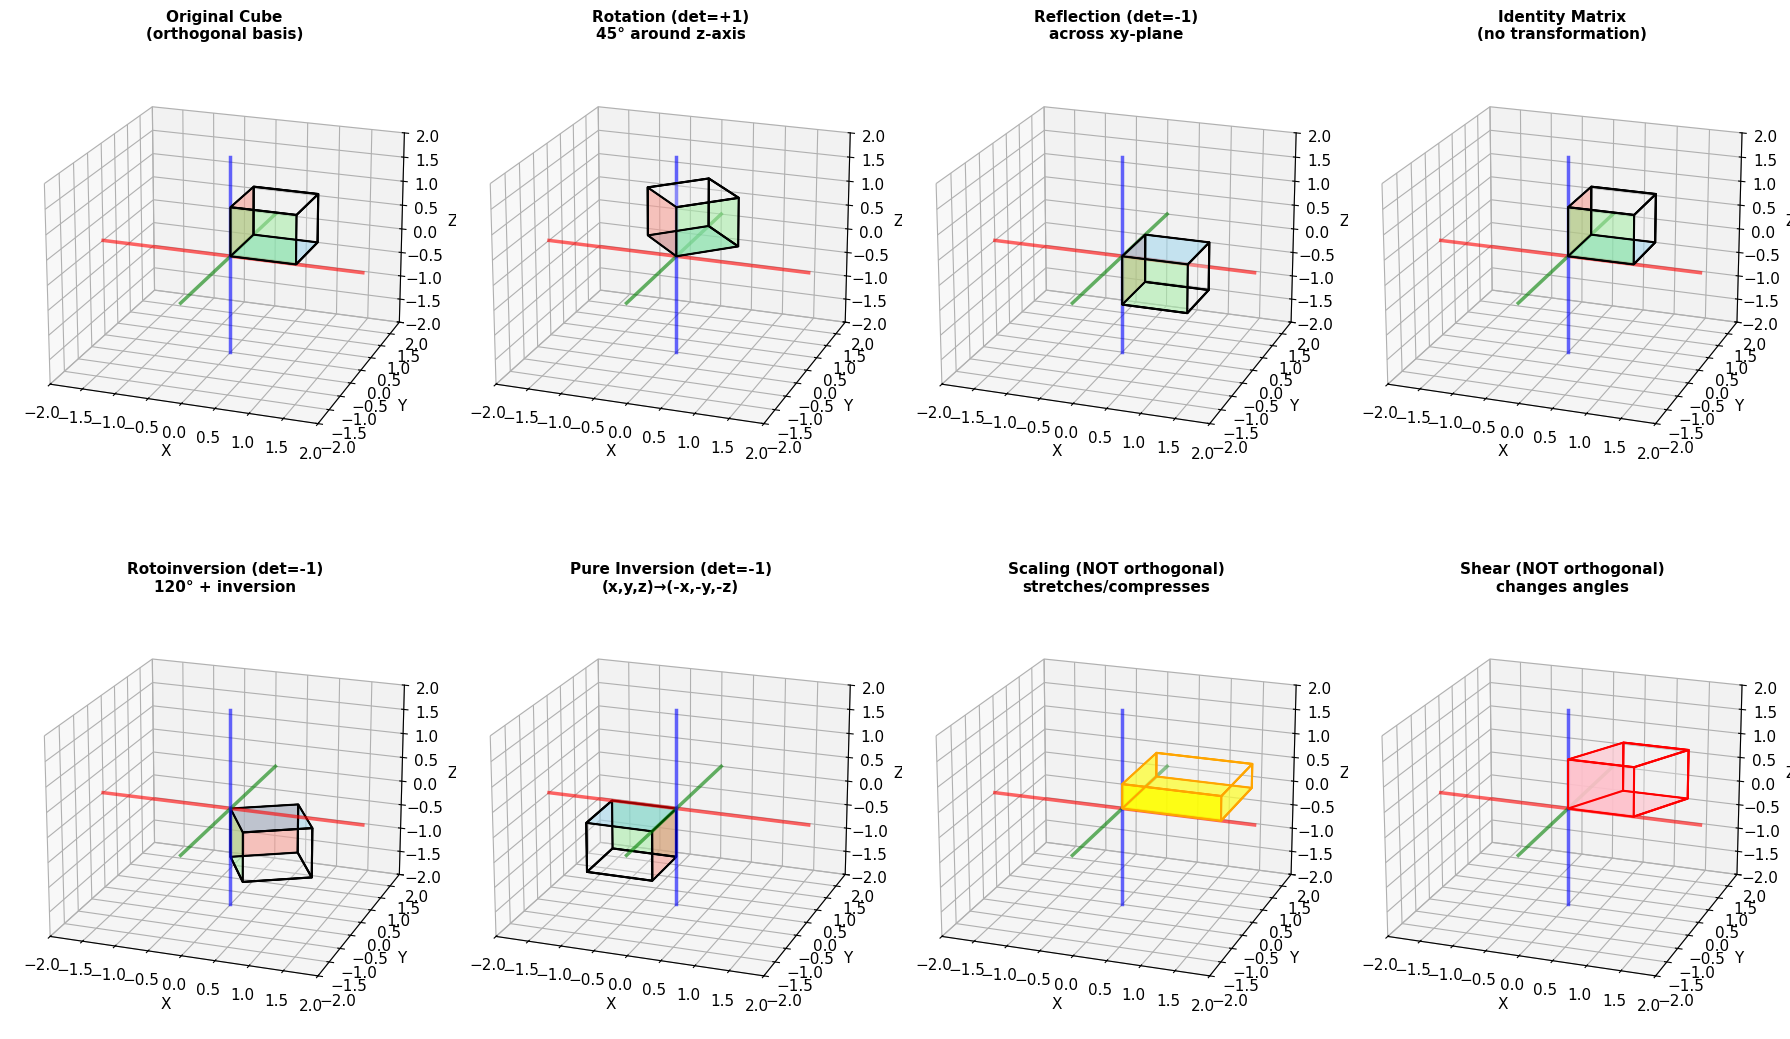


KEY OBSERVATIONS IN 3D:
Coordinate axes: Red=X, Green=Y, Blue=Z (spanning full frame)
Cube faces match perpendicular axis color:
  • Blue faces (top/bottom, xy-plane) are perpendicular to Blue Z-axis
  • Salmon faces (left/right, yz-plane) are perpendicular to Red X-axis
  • Green faces (front/back, zx-plane) are perpendicular to Green Y-axis

✓ Top row & bottom-left: CUBE remains a CUBE (all orthogonal)
  → Watch the colored faces to see how orientation changes!
  → Rotation: blue face stays on top (rotates around Z-axis)
  → Reflection: blue face flips to bottom (negative Z)
  → Rotoinversion & Inversion: all faces flip orientation

  → Orthogonal transformations preserve:
     - Edge lengths (all edges still length 1)
     - Angles (all angles still 90°)
     - Volume (still 1 cubic unit)

✗ Bottom-right two: CUBE becomes PARALLELEPIPED (non-orthogonal)
  → All faces shown in uniform color (yellow/pink) to emphasize distortion
  → Scaling: edges have different lengths
  → Shear: an

In [39]:
# Visualize all transformations as colored parallelepipeds
fig = plt.figure(figsize=(18, 12))

origin = np.array([0, 0, 0])

# Set viewing angles for all 3D plots (adjust these to change all views at once)
viewing_elev = 20  # Elevation angle (degrees) - higher = view from above
viewing_azim = -70  # Azimuth angle (degrees) - controls left/right viewing angle

# Helper function to draw coordinate axes spanning the full frame
def draw_axes(ax, axis_range=2, linewidth=2.5, zorder=1):
    """Draw X, Y, Z axes spanning the full plot range"""
    # X-axis (red) - spans from -axis_range to +axis_range
    ax.plot([-axis_range, axis_range], [0, 0], [0, 0], 'r-', linewidth=linewidth, alpha=0.6, zorder=zorder)
    # Y-axis (green)
    ax.plot([0, 0], [-axis_range, axis_range], [0, 0], 'g-', linewidth=linewidth, alpha=0.6, zorder=zorder)
    # Z-axis (blue)
    ax.plot([0, 0], [0, 0], [-axis_range, axis_range], 'b-', linewidth=linewidth, alpha=0.6, zorder=zorder)

# Row 1: Original cube and orthogonal transformations (det = +1)
ax1 = fig.add_subplot(2, 4, 1, projection='3d')
draw_axes(ax1)
plot_parallelepiped_colored(ax1, origin, unit_vectors, face_colors=face_colors, edgecolor='black', alpha=0.5)
ax1.set_title('Original Cube\n(orthogonal basis)', fontweight='bold', fontsize=11)
ax1.set_xlim(-2, 2); ax1.set_ylim(-2, 2); ax1.set_zlim(-2, 2)
ax1.set_xlabel('X'); ax1.set_ylabel('Y'); ax1.set_zlabel('Z')
ax1.view_init(elev=viewing_elev, azim=viewing_azim)

ax2 = fig.add_subplot(2, 4, 2, projection='3d')
draw_axes(ax2)
plot_parallelepiped_colored(ax2, origin, cube_rotated, face_colors=face_colors, edgecolor='black', alpha=0.5)
ax2.set_title('Rotation (det=+1)\n45° around z-axis', fontweight='bold', fontsize=11)
ax2.set_xlim(-2, 2); ax2.set_ylim(-2, 2); ax2.set_zlim(-2, 2)
ax2.set_xlabel('X'); ax2.set_ylabel('Y'); ax2.set_zlabel('Z')
ax2.view_init(elev=viewing_elev, azim=viewing_azim)

ax3 = fig.add_subplot(2, 4, 3, projection='3d')
draw_axes(ax3)
plot_parallelepiped_colored(ax3, origin, cube_reflected, face_colors=face_colors, edgecolor='black', alpha=0.5)
ax3.set_title('Reflection (det=-1)\nacross xy-plane', fontweight='bold', fontsize=11)
ax3.set_xlim(-2, 2); ax3.set_ylim(-2, 2); ax3.set_zlim(-2, 2)
ax3.set_xlabel('X'); ax3.set_ylabel('Y'); ax3.set_zlabel('Z')
ax3.view_init(elev=viewing_elev, azim=viewing_azim)

ax4 = fig.add_subplot(2, 4, 4, projection='3d')
draw_axes(ax4)
plot_parallelepiped_colored(ax4, origin, unit_vectors, face_colors=face_colors, edgecolor='black', alpha=0.5)
ax4.set_title('Identity Matrix\n(no transformation)', fontweight='bold', fontsize=11)
ax4.set_xlim(-2, 2); ax4.set_ylim(-2, 2); ax4.set_zlim(-2, 2)
ax4.set_xlabel('X'); ax4.set_ylabel('Y'); ax4.set_zlabel('Z')
ax4.view_init(elev=viewing_elev, azim=viewing_azim)

# Row 2: New 3D phenomena (improper orthogonal) and non-orthogonal distortions
ax5 = fig.add_subplot(2, 4, 5, projection='3d')
plot_parallelepiped_colored(ax5, origin, cube_rotoinv, face_colors=face_colors, edgecolor='black', alpha=0.5)
draw_axes(ax5, zorder=100)  # High zorder to draw axes in front
ax5.set_title('Rotoinversion (det=-1)\n120° + inversion', fontweight='bold', fontsize=11)
ax5.set_xlim(-2, 2); ax5.set_ylim(-2, 2); ax5.set_zlim(-2, 2)
ax5.set_xlabel('X'); ax5.set_ylabel('Y'); ax5.set_zlabel('Z')
ax5.view_init(elev=viewing_elev, azim=viewing_azim)

ax6 = fig.add_subplot(2, 4, 6, projection='3d')
plot_parallelepiped_colored(ax6, origin, cube_inverted, face_colors=face_colors, edgecolor='black', alpha=0.5)
draw_axes(ax6, zorder=100)  # High zorder to draw axes in front
ax6.set_title('Pure Inversion (det=-1)\n(x,y,z)→(-x,-y,-z)', fontweight='bold', fontsize=11)
ax6.set_xlim(-2, 2); ax6.set_ylim(-2, 2); ax6.set_zlim(-2, 2)
ax6.set_xlabel('X'); ax6.set_ylabel('Y'); ax6.set_zlabel('Z')
ax6.view_init(elev=viewing_elev, azim=viewing_azim)

ax7 = fig.add_subplot(2, 4, 7, projection='3d')
draw_axes(ax7)
plot_parallelepiped_colored(ax7, origin, cube_scaled, face_colors=['yellow', 'yellow', 'yellow'], edgecolor='orange', alpha=0.7)
ax7.set_title('Scaling (NOT orthogonal)\nstretches/compresses', fontweight='bold', fontsize=11)
ax7.set_xlim(-2, 2); ax7.set_ylim(-2, 2); ax7.set_zlim(-2, 2)
ax7.set_xlabel('X'); ax7.set_ylabel('Y'); ax7.set_zlabel('Z')
ax7.view_init(elev=viewing_elev, azim=viewing_azim)

ax8 = fig.add_subplot(2, 4, 8, projection='3d')
draw_axes(ax8)
plot_parallelepiped_colored(ax8, origin, cube_sheared, face_colors=['pink', 'pink', 'pink'], edgecolor='red', alpha=0.7)
ax8.set_title('Shear (NOT orthogonal)\nchanges angles', fontweight='bold', fontsize=11)
ax8.set_xlim(-2, 2); ax8.set_ylim(-2, 2); ax8.set_zlim(-2, 2)
ax8.set_xlabel('X'); ax8.set_ylabel('Y'); ax8.set_zlabel('Z')
ax8.view_init(elev=viewing_elev, azim=viewing_azim)

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("KEY OBSERVATIONS IN 3D:")
print("="*70)
print("Coordinate axes: Red=X, Green=Y, Blue=Z (spanning full frame)")
print("Cube faces match perpendicular axis color:")
print("  • Blue faces (top/bottom, xy-plane) are perpendicular to Blue Z-axis")
print("  • Salmon faces (left/right, yz-plane) are perpendicular to Red X-axis")
print("  • Green faces (front/back, zx-plane) are perpendicular to Green Y-axis")
print()
print("✓ Top row & bottom-left: CUBE remains a CUBE (all orthogonal)")
print("  → Watch the colored faces to see how orientation changes!")
print("  → Rotation: blue face stays on top (rotates around Z-axis)")
print("  → Reflection: blue face flips to bottom (negative Z)")
print("  → Rotoinversion & Inversion: all faces flip orientation")
print()
print("  → Orthogonal transformations preserve:")
print("     - Edge lengths (all edges still length 1)")
print("     - Angles (all angles still 90°)")
print("     - Volume (still 1 cubic unit)")
print()
print("✗ Bottom-right two: CUBE becomes PARALLELEPIPED (non-orthogonal)")
print("  → All faces shown in uniform color (yellow/pink) to emphasize distortion")
print("  → Scaling: edges have different lengths")
print("  → Shear: angles are no longer 90°")
print()
print("→ In 3D, O(3) includes rotations, reflections, rotoinversions, and inversion")
print("→ All preserve the cube structure, just reorient or flip it")
print("→ Rotoinversion is particularly important in crystallography")
print("="*70)

### Understanding the Dimension of $O(n)$

Why does the dimension of the ambiguity space matter?

- **2D case**: $O(2)$ has dimension $\frac{2(2-1)}{2} = 1$ → continuous rotation by angle $\theta$
- **3D case**: $O(3)$ has dimension $\frac{3(3-1)}{2} = 3$ → three independent rotation angles (Euler angles)
- **$n$-D case**: $O(n)$ has dimension $\frac{n(n-1)}{2}$ → grows quadratically!

For EFA with 2 components, this means:
- Level 2 (smoothness only): 1-dimensional continuous ambiguity
- Need non-negativity (Level 3) to reduce this to discrete choices

For EFA with 3 components:
- Level 2: 3-dimensional continuous ambiguity (much worse!)
- Non-negativity becomes even more critical

## Part 5: Connection to Matrix Factorization

Now let's connect this to the factorization problem in EFA/REGALS.

### The Problem

We have data $M$ and want to find $P$ and $C$ such that:
$$M = P \cdot C$$

But there's ambiguity! If we insert any invertible matrix $R$ and its inverse:
$$M = P \cdot C = (P R) \cdot (R^{-1} C)$$

This gives us **infinitely many solutions** that fit the data equally well.

### The Question

**Which transformations $R$ should we allow?**

Let's demonstrate with a simple example:

In [8]:
# Create simple synthetic data: M = P @ C
np.random.seed(123)

# Original factorization
P_true = np.random.rand(10, 2) * 2  # 10 rows, 2 components
C_true = np.random.rand(2, 5) * 2   # 2 components, 5 columns
M = P_true @ C_true

print("Original factorization: M = P @ C")
print(f"M shape: {M.shape}")
print(f"P shape: {P_true.shape}")
print(f"C shape: {C_true.shape}")
print(f"\nData matrix M (first 5 rows):")
print(M[:5])

Original factorization: M = P @ C
M shape: (10, 5)
P shape: (10, 2)
C shape: (2, 5)

Data matrix M (first 5 rows):
[[2.137 2.781 2.28  2.038 2.735]
 [1.288 1.569 1.161 1.202 2.047]
 [2.372 3.057 2.471 2.256 3.147]
 [3.373 4.323 3.467 3.202 4.563]
 [1.727 2.202 1.752 1.636 2.379]]


### Testing Different Transformations

Let's try three types of transformations and see what happens:

In [9]:
# 1. Orthogonal transformation (rotation)
angle = np.pi/3  # 60 degrees
R_orth = np.array([
    [np.cos(angle), -np.sin(angle)],
    [np.sin(angle),  np.cos(angle)]
])

# 2. Scaling transformation
R_scale_2d = np.array([
    [2, 0],
    [0, 0.5]
])

# 3. Shear transformation
R_shear_2d = np.array([
    [1, 0.8],
    [0, 1]
])

# Apply transformations: M = (P @ R) @ (R^-1 @ C)
P_orth = P_true @ R_orth
C_orth = np.linalg.inv(R_orth) @ C_true
M_orth = P_orth @ C_orth

P_scaled = P_true @ R_scale_2d
C_scaled = np.linalg.inv(R_scale_2d) @ C_true
M_scaled = P_scaled @ C_scaled

P_sheared = P_true @ R_shear_2d
C_sheared = np.linalg.inv(R_shear_2d) @ C_true
M_sheared = P_sheared @ C_sheared

# Check if we still get M
print("Do all transformations reproduce M exactly?\n")
print(f"Orthogonal: max error = {np.max(np.abs(M - M_orth)):.2e}  ✓")
print(f"Scaling:    max error = {np.max(np.abs(M - M_scaled)):.2e}  ✓")
print(f"Shear:      max error = {np.max(np.abs(M - M_sheared)):.2e}  ✓")
print("\n→ ALL transformations reproduce the data perfectly!")
print("→ We need additional constraints to choose between them.")

Do all transformations reproduce M exactly?

Orthogonal: max error = 4.44e-16  ✓
Scaling:    max error = 0.00e+00  ✓
Shear:      max error = 8.88e-16  ✓

→ ALL transformations reproduce the data perfectly!
→ We need additional constraints to choose between them.


## Part 6: Why Does Smoothness Restrict to Orthogonal Transformations?

This is the key insight from the REGALS method!

### The Smoothness Penalty

REGALS adds a penalty for non-smooth concentration profiles:
$$\text{Objective} = \|M - PC\|^2 + \lambda \|D^2 C\|^2$$

where $D^2$ is the second derivative operator (measures curvature).

### The Magic Property

**The smoothness penalty is orthogonal-invariant:**
$$\|D^2(R^{-1}C)\|^2 = \|D^2 C\|^2 \quad \text{if and only if } R \in O(n)$$

This means:
- ✓ Orthogonal transformations: smoothness unchanged → allowed
- ✗ Non-orthogonal transformations: smoothness changes → penalized/eliminated

Let's verify this numerically:

In [11]:
# Create second derivative operator for our 5-point curves
n_points = 5
D2 = np.zeros((n_points - 2, n_points))
for i in range(n_points - 2):
    D2[i, i:i+3] = [1, -2, 1]  # Second difference

print("Second derivative operator D2:")
print(D2)

# Compute smoothness for each factorization
def smoothness(C):
    """Compute smoothness penalty ||D^2 C||^2"""
    return np.linalg.norm(D2 @ C.T) ** 2

smooth_true = smoothness(C_true)
smooth_orth = smoothness(C_orth)
smooth_scaled = smoothness(C_scaled)
smooth_sheared = smoothness(C_sheared)

print("\nSmoothness values:")
print(f"True factorization: {smooth_true:.4f}")
print(f"After rotation:     {smooth_orth:.4f}  (change: {abs(smooth_orth - smooth_true):.2e})  ✓ Unchanged!")
print(f"After scaling:      {smooth_scaled:.4f}  (change: {abs(smooth_scaled - smooth_true):.4f})  ✗ Changed")
print(f"After shear:        {smooth_sheared:.4f}  (change: {abs(smooth_sheared - smooth_true):.4f})  ✗ Changed")

print("\n" + "="*70)
print("KEY INSIGHT:")
print("Only orthogonal transformations preserve the smoothness penalty!")
print("This is why REGALS Level 2 restricts ambiguity from 'any matrix' to O(n).")
print("="*70)

Second derivative operator D2:
[[ 1. -2.  1.  0.  0.]
 [ 0.  1. -2.  1.  0.]
 [ 0.  0.  1. -2.  1.]]

Smoothness values:
True factorization: 1.2379
After rotation:     1.2379  (change: 0.00e+00)  ✓ Unchanged!
After scaling:      2.4572  (change: 1.2193)  ✗ Changed
After shear:        0.8235  (change: 0.4144)  ✗ Changed

KEY INSIGHT:
Only orthogonal transformations preserve the smoothness penalty!
This is why REGALS Level 2 restricts ambiguity from 'any matrix' to O(n).


## Part 7: Summary and Connection to EFA Limitations

### What We Learned

1. **Orthogonal matrices** ($R^T R = I$) preserve lengths and angles
   - They include rotations ($\det = +1$) and reflections ($\det = -1$)
   - Together they form the orthogonal group $O(n)$

2. **Matrix factorization has inherent ambiguity**
   - $M = PC = (PR)(R^{-1}C)$ for ANY invertible $R$
   - We need constraints to reduce this ambiguity

3. **Smoothness regularization restricts to $O(n)$**
   - The smoothness penalty $\|D^2 C\|^2$ is preserved by orthogonal transformations
   - Non-orthogonal transformations (scaling, shear) change the smoothness value
   - This naturally eliminates most of the ambiguity!

### The Four-Level Hierarchy (Preview)

The full constraint hierarchy in the factorization problem:

| Level | Constraints | Ambiguity Group | Dimension |
|-------|------------|----------------|----------|
| 1 | Data fit only | All invertible matrices | $n^2$ |
| 2 | + Smoothness | **Orthogonal group $O(n)$** | $\frac{n(n-1)}{2}$ |
| 3 | + Non-negativity | Permutation + small rotation | $\approx n$ |
| 4 | + Physical constraints | Usually unique | 0 |

**The jump from Level 1 → Level 2** is where understanding orthogonal transformations becomes crucial!

### Connection to limitation_4 Notebook

The `limitation_4_no_quantification.ipynb` notebook demonstrates this ambiguity problem:
- Shows that EFA (Level 2) still has continuous rotation ambiguity
- Demonstrates that different rotations give equally good fits
- Explains why non-negativity (Level 3) is needed for practical uniqueness

Now you should be able to understand the mathematical concepts in that notebook!

## Further Reading

If you want to go deeper:

1. **For orthogonal matrices**: [Wikipedia: Orthogonal matrix](https://en.wikipedia.org/wiki/Orthogonal_matrix)
2. **For the factorization ambiguity**: See `explorations/underdeterminedness_exploration.ipynb`
3. **For the complete constraint hierarchy**: See `explorations/REGALS_analysis_summary.md`
4. **For practical implications**: See `evidence/efa_original/limitation_4_no_quantification.ipynb`